# Preprocessing

## Importing Necessary Libraries 

In [2]:
import pandas as pd
import numpy as np
import ipinfo
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from category_encoders.hashing import HashingEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("dataset/CIC-Darknet 2020/Darknet.CSV", low_memory=False)
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


## Fixing The Duplicates

In [4]:
data_copy=data.copy()

In [6]:
darknet_detection = data_copy["Label"].unique()
print(darknet_detection)

['Non-Tor' 'NonVPN' 'Tor' 'VPN']


In [7]:
darknet_characterization = data_copy["Label.1"].unique()
print(darknet_characterization)

['AUDIO-STREAMING' 'Browsing' 'Chat' 'Email' 'File-Transfer'
 'File-transfer' 'P2P' 'Video-Streaming' 'Audio-Streaming'
 'Video-streaming' 'VOIP']


In [9]:
data_copy['Label.1'].loc[data_copy['Label.1'] == 'File-transfer'] = 'File-Transfer'
data_copy['Label.1'].loc[data_copy['Label.1'] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
data_copy['Label.1'].loc[data_copy['Label.1'] == 'Video-streaming'] = 'Video-Streaming'
darknet_characterization_labels = data_copy["Label.1"].unique()
print(darknet_characterization_labels)

['Audio-Streaming' 'Browsing' 'Chat' 'Email' 'File-Transfer' 'P2P'
 'Video-Streaming' 'VOIP']


C:\Users\acer\AppData\Local\Temp\ipykernel_13532\1145864199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['Label.1'].loc[data_copy['Label.1'] == 'File-transfer'] = 'File-Transfer'
C:\Users\acer\AppData\Local\Temp\ipykernel_13532\1145864199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['Label.1'].loc[data_copy['Label.1'] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
C:\Users\acer\AppData\Local\Temp\ipykernel_13532\1145864199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

## Grouping in Benign and Darknet

In [10]:
data_copy['Label'].loc[(data_copy['Label'] == 'Non-Tor') | (data_copy['Label'] == 'NonVPN')] = 'Benign'
data_copy['Label'].loc[(data_copy['Label'] == 'Tor') | (data_copy['Label'] == 'VPN')] = 'Darknet'
traffic_labels = data_copy["Label"].unique()
print(traffic_labels)

['Benign' 'Darknet']


C:\Users\acer\AppData\Local\Temp\ipykernel_13532\1250638641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['Label'].loc[(data_copy['Label'] == 'Non-Tor') | (data_copy['Label'] == 'NonVPN')] = 'Benign'
C:\Users\acer\AppData\Local\Temp\ipykernel_13532\1250638641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['Label'].loc[(data_copy['Label'] == 'Tor') | (data_copy['Label'] == 'VPN')] = 'Darknet'


## Extracting Timestamp

In [13]:
hr = []
for timestamp in data_copy['Timestamp']:
    hora = int(timestamp.split()[1].split(':')[0])
    hr.append(hora)
data_copy['hour'] = hr
print(data_copy[['Timestamp', 'hour']][:5])

                Timestamp  hour
0  24/07/2015 04:09:48 PM     4
1  24/07/2015 04:09:48 PM     4
2  24/07/2015 04:09:48 PM     4
3  24/07/2015 04:09:48 PM     4
4  24/07/2015 04:09:45 PM     4


## Source and Destination IPS feature extraction

In [15]:
#unigram, bigram and trigram extraction
def create_grams(ip):
    parts = ip.split('.')
    one_gram = parts[0]
    two_gram = parts[0] + " " + parts[1]
    three_gram = parts[0] + " " + parts[1] + " " + parts[2]
    return one_gram, two_gram, three_gram

In [17]:
src_one_gram = []
src_two_gram = []
src_three_gram = []
dst_one_gram = []
dst_two_gram = []
dst_three_gram = []

for src_ip, dst_ip in zip(data_copy["Src IP"], data_copy["Dst IP"]): 
    src_one, src_two, src_three = create_grams(src_ip)
    src_one_gram.append(src_one)
    src_two_gram.append(src_two)
    src_three_gram.append(src_three)
    dst_one, dst_two, dst_three = create_grams(dst_ip)
    dst_one_gram.append(dst_one)
    dst_two_gram.append(dst_two)
    dst_three_gram.append(dst_three)

data_copy["src_ip_1gram"] = src_one_gram
data_copy["src_ip_2gram"] = src_two_gram
data_copy["src_ip_3gram"] = src_three_gram
data_copy["dst_ip_1gram"] = dst_one_gram
data_copy["dst_ip_2gram"] = dst_two_gram
data_copy["dst_ip_3gram"] = dst_three_gram

In [18]:
print(data_copy[["Src IP","src_ip_1gram","src_ip_2gram","src_ip_3gram"]][:5])
print(data_copy[["Dst IP","dst_ip_1gram","dst_ip_2gram","dst_ip_3gram"]][:5])

          Src IP src_ip_1gram src_ip_2gram src_ip_3gram
0  10.152.152.11           10       10 152   10 152 152
1  10.152.152.11           10       10 152   10 152 152
2  10.152.152.11           10       10 152   10 152 152
3  10.152.152.11           10       10 152   10 152 152
4  10.152.152.11           10       10 152   10 152 152
           Dst IP dst_ip_1gram dst_ip_2gram dst_ip_3gram
0   216.58.220.99          216       216 58   216 58 220
1   216.58.220.99          216       216 58   216 58 220
2   216.58.220.99          216       216 58   216 58 220
3  74.125.136.120           74       74 125   74 125 136
4  173.194.65.127          173      173 194   173 194 65


## Extracting Ips details

In [19]:
def get_ip_detail(ip, ip_dict, repeated):
    if ip not in ip_dict.keys():
        details = ipinfo_handler.getDetails(ip)
        ip_dict[ip] = details.all
    else:
        repeated += 1
    return repeated

def dump_ips(ip_dict, folder):
    j = json.dumps(ip_dict)
    f = open(folder+"ips_dict.json","w")
    f.write(j)
    f.close()

def load_ips(file):
    data = {}
    with open(file) as json_file:
        data = json.load(json_file)
    return data

In [20]:
ip_dict = load_ips("ips_dict.json")

In [22]:
ips = np.concatenate((data_copy["Src IP"].unique(), data_copy["Dst IP"].unique())) 
for i in tqdm(range(len(ips))):
    get_ip_detail(ips[i], ip_dict, 0)
dump_ips(ip_dict, "")

100%|████████████████████████████████████████████████████████████████| 11111/11111 [00:00<00:00, 699145.05it/s]


In [23]:
ips_tuple = zip(data_copy["Src IP"], data_copy["Dst IP"])
dst_ip_country = []
src_ip_country = []
src_bogon = []
dst_bogon = []

for src_ip, dst_ip in tqdm(ips_tuple, total=len(data_copy["Src IP"])):
    if 'country' in ip_dict[dst_ip].keys():
        dst_ip_country.append(ip_dict[dst_ip]['country'])
    else:
        dst_ip_country.append("")
    if 'country' in ip_dict[src_ip].keys():
        src_ip_country.append(ip_dict[src_ip]['country'])
    else:
        src_ip_country.append("")
    if 'bogon' in ip_dict[dst_ip].keys():
        dst_bogon.append(ip_dict[dst_ip]['bogon'])
    else:
        dst_bogon.append(False)
    if 'bogon' in ip_dict[src_ip].keys():
        src_bogon.append(ip_dict[src_ip]['bogon'])
    else:
        src_bogon.append(False)
data_copy['src_ip_country'] = src_ip_country
data_copy['dst_ip_country'] = dst_ip_country
data_copy['src_bogon'] = src_bogon
data_copy['dst_bogon'] = dst_bogon

100%|██████████████████████████████████████████████████████████████| 141530/141530 [00:00<00:00, 381104.04it/s]


## Handling Of Infinity And Missing Values

In [25]:
real_columns = ['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']
print(real_columns)

['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average

In [29]:
is_na_cols = data_copy.columns[data_copy.isna().sum() > 0]
data_copy.isna().sum()[is_na_cols] 

Flow Bytes/s    47
dtype: int64

In [31]:
samples = data_copy.dropna()
samples.isna().sum()[is_na_cols] 

Flow Bytes/s    0
dtype: int64

In [32]:
data_copy[real_columns] = data_copy[real_columns].astype(np.float64)
data_copy[real_columns] = data_copy[real_columns].replace([np.inf, -np.inf], np.nan)
data_copy[real_columns] = data_copy[real_columns].dropna()

## Removing Irrelevent Attributes

In [34]:
model_samples = data_copy.copy()

del model_samples['Flow ID']
del model_samples['Timestamp']
del model_samples['Src IP']
del model_samples['Dst IP']

In [35]:
cols = np.concatenate((model_samples.columns[81:], model_samples.columns[:81]))
model_samples = model_samples[cols]

In [36]:
model_samples.columns

Index(['hour', 'src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram',
       'dst_ip_2gram', 'dst_ip_3gram', 'src_ip_country', 'dst_ip_country',
       'src_bogon', 'dst_bogon', 'Src Port', 'Dst Port', 'Protocol',
       'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Pac

## Categorical Feature Encoding

In [38]:
hash_enc_cols = ['src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram',
 'dst_ip_2gram', 'dst_ip_3gram']
print(hash_enc_cols)
ord_enc_cols = ['src_ip_country','dst_ip_country']
print(ord_enc_cols)

['src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram', 'dst_ip_2gram', 'dst_ip_3gram']
['src_ip_country', 'dst_ip_country']


In [39]:
hash_enc = HashingEncoder(cols=hash_enc_cols, n_components=100).fit(model_samples)
model_samples = hash_enc.transform(model_samples)
model_samples.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Benign,Audio-Streaming


In [40]:
ord_enc = OrdinalEncoder()
ord_enc.fit(model_samples[ord_enc_cols])
model_samples[ord_enc_cols] = ord_enc.transform(model_samples[ord_enc_cols])
model_samples[ord_enc_cols] = model_samples[ord_enc_cols].astype(int)
model_samples[ord_enc_cols].head() 

,src_ip_country,dst_ip_country
0,0,134
1,0,134
2,0,134
3,0,134
4,0,134


In [41]:
print(model_samples.columns)

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9',
       ...
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label', 'Label.1'],
      dtype='object', length=186)


## Numerical Feature Scaling

In [42]:
scaler = StandardScaler().fit(model_samples[real_columns])
model_samples[real_columns] = scaler.transform(model_samples[real_columns])
model_samples[real_columns].head()

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min
0,-0.546508,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.345303,-0.095141,-0.061219,0.589647
1,-0.546503,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.335704,-0.095141,-0.061219,0.589647
2,-0.546502,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.329439,-0.095141,-0.061219,0.589647
3,-0.546504,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.333582,-0.095141,-0.061219,0.589647
4,-0.263585,0.184194,0.071741,-0.014801,-0.027116,-0.120075,-0.498852,0.179861,-0.247304,0.340530,...,0.164343,-0.036900,-0.634075,0.158678,0.0,-0.368398,-0.396835,0.073134,0.305786,0.589647


In [43]:
samples = samples.dropna()
model_samples = model_samples.dropna()
print(samples[samples.columns[samples.isna().sum()>0]].isna().sum())

Series([], dtype: float64)


In [44]:
print(samples['Flow ID'].dtypes)

object


In [46]:
model_samples.to_csv('dataset/processed dataset' + 'CIC-Darknet2020_processed_encoded.csv', index=False)

## Balancing The Dataset Using SMOTE

In [47]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [48]:
df = pd.read_csv('dataset/processed dataset/CIC-Darknet2020_processed_encoded.csv')
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Benign,Audio-Streaming


In [49]:
df = df.drop('Label.1', axis=1)

# Separate features (X) and target variable (y)
X = df.drop('Label', axis=1)
y = df['Label']

In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
# Replace the original training data with the resampled data
df_train_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns), pd.DataFrame(y_train_resampled, columns=['Label'])], axis=1)

In [52]:
# Check the count of classes in the 'target' column
class_counts = df_train_resampled['Label'].value_counts()

# Display the class counts
print(class_counts)

Label
Benign     93763
Darknet    93763
Name: count, dtype: int64


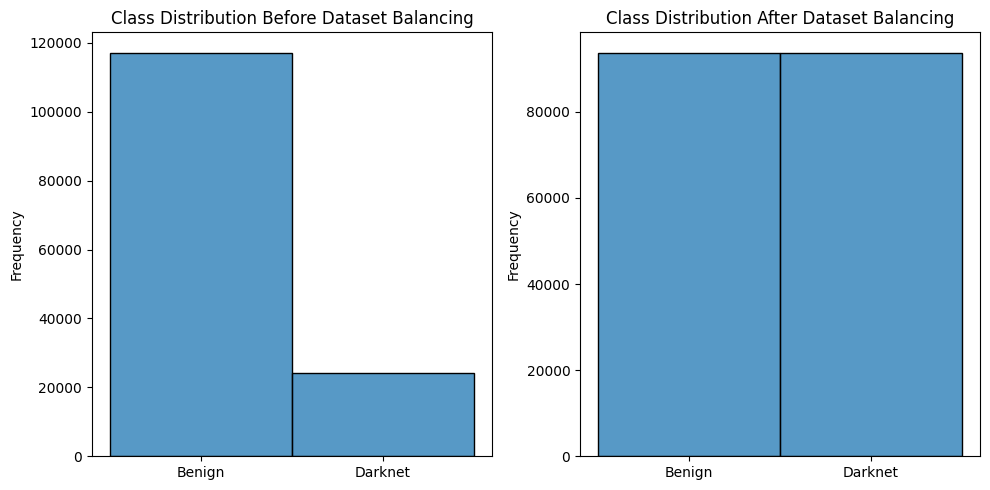

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Class Distribution Before Dataset Balancing
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=samples, x="Label", stat="frequency")
plt.xlabel('')
plt.title('Class Distribution Before Dataset Balancing')

# Plotting Class Distribution After Dataset Balancing
plt.subplot(1, 2, 2)
sns.histplot(data=df_train_resampled, x="Label", stat="frequency")
plt.xlabel('')
plt.title('Class Distribution After Dataset Balancing')

plt.tight_layout()
plt.show()


In [58]:
# Save the resampled training dataset to a new CSV file
df_train_resampled.to_csv('dataset/CIC-Darknet2020_Balanced'+'darknet_balanced_dataset.csv', index=False)